In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

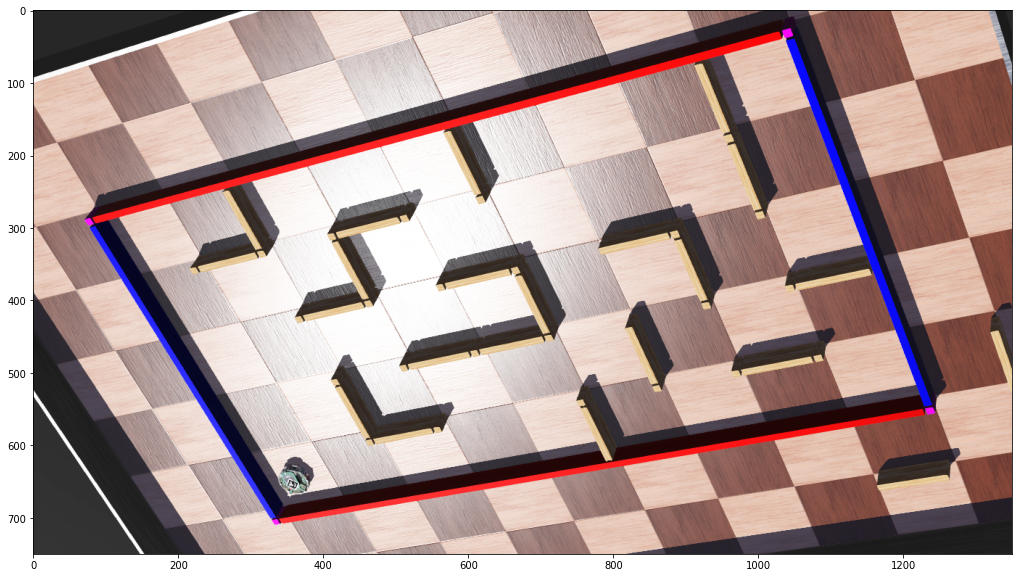

In [2]:
img = cv2.imread('../MAZE_TEST_10.png')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (18,10))
plt.imshow(img_rgb)
plt.show()

In [3]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_gray = cv2.imread('../MAZE_TEST_10.png',cv2.IMREAD_GRAYSCALE)
mask1 = (img_hsv[:,:,0] >= 140) & (img_hsv[:,:,0] <= 150) & (img_hsv[:,:,1] > 50) & (img_hsv[:,:,2] > 100)
mask1 = np.array(mask1,dtype=np.uint8)
kernel = np.ones((3,3), np.uint8)
mask1 = cv2.erode(mask1, kernel, iterations = 1)
masked_data = cv2.bitwise_and(img_gray, img_gray, mask=mask1)

In [4]:
corner1 = masked_data[:375,:337]
corner2 = masked_data[:375,1013:]
corner3 = masked_data[375:,:337]
corner4 = masked_data[375:,1013:]
ret1,thresh1 = cv2.threshold(corner1,0,255,0)
ret2,thresh2 = cv2.threshold(corner2,0,255,0)
ret3,thresh3 = cv2.threshold(corner3,0,255,0)
ret4,thresh4 = cv2.threshold(corner4,0,255,0)
M1 = cv2.moments(thresh1)
M2 = cv2.moments(thresh2)
M3 = cv2.moments(thresh3)
M4 = cv2.moments(thresh4)
cX1 = int(M1["m10"] / M1["m00"])
cY1 = int(M1["m01"] / M1["m00"])
cX2 = int(M2["m10"] / M2["m00"])
cY2 = int(M2["m01"] / M2["m00"])
cX3 = int(M3["m10"] / M3["m00"])
cY3 = int(M3["m01"] / M3["m00"])
cX4 = int(M4["m10"] / M4["m00"])
cY4 = int(M4["m01"] / M4["m00"])

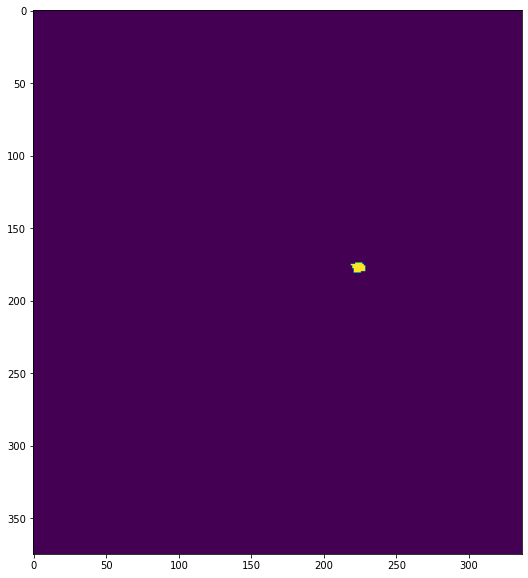

In [5]:
plt.figure(figsize = (18,10))
plt.imshow(corner4)
plt.show()

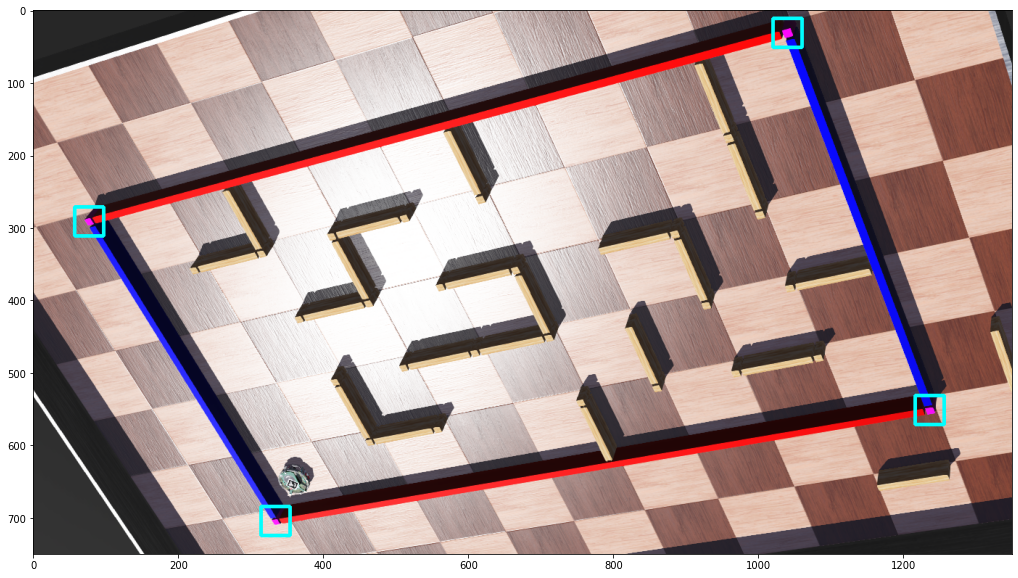

In [6]:
img_rgb = cv2.rectangle(img_rgb,(cX1-20,cY1-20),(cX1+20,cY1+20),(0,255,255),3)
img_rgb = cv2.rectangle(img_rgb,(cX2-20+1013,cY2-20),(cX2+20+1013,cY2+20),(0,255,255),3)
img_rgb = cv2.rectangle(img_rgb,(cX3-20,cY3-20+375),(cX3+20,cY3+20+375),(0,255,255),3)
img_rgb = cv2.rectangle(img_rgb,(cX4-20+1013,cY4-20+375),(cX4+20+1013,cY4+20+375),(0,255,255),3)
plt.figure(figsize = (18,10))
plt.imshow(img_rgb)
plt.show()

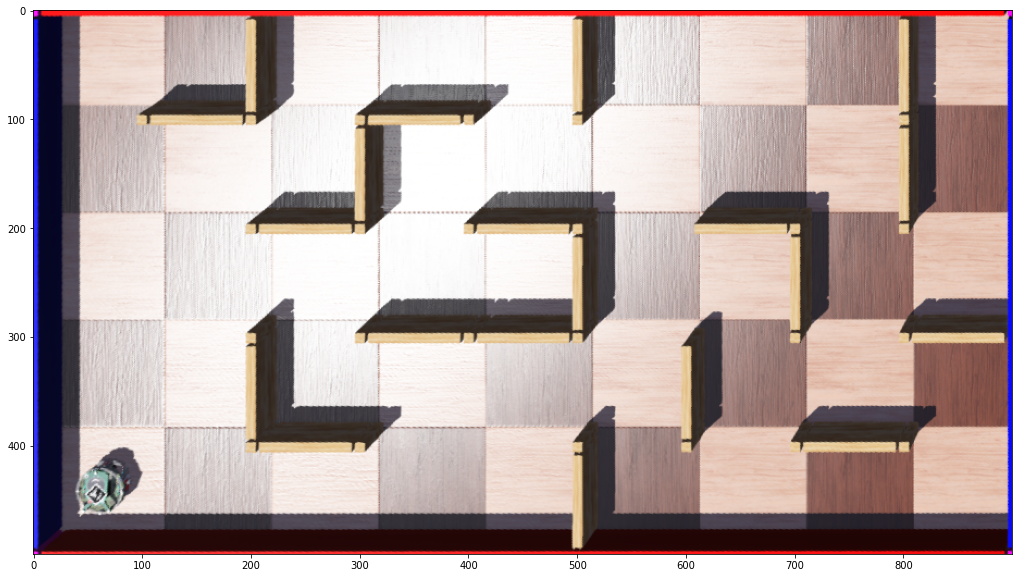

In [7]:
img_rgb1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pts1 = np.float32([[cX1,cY1],[cX2+1013,cY2],[cX3,cY3+375],[cX4+1013,cY4+375]])
pts2 = np.float32([[0,0],[900,0],[0,500],[900,500]])
H = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_rgb1, H, (900,500))
plt.figure(figsize = (18,10))
plt.imshow(dst)
plt.show()

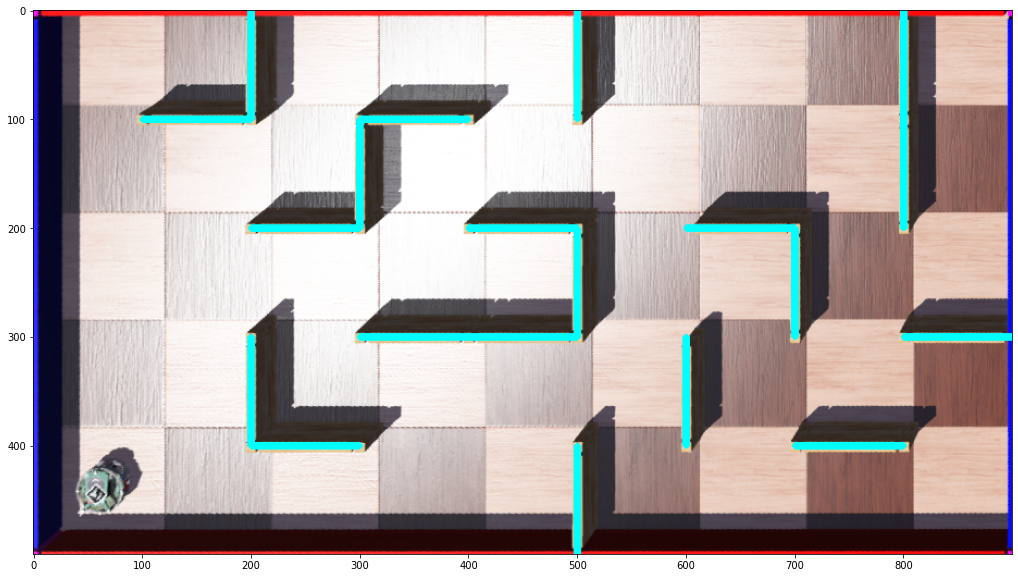

In [8]:
img_hsv2 = cv2.cvtColor(dst,cv2.COLOR_RGB2HSV)
mask2 = (img_hsv2[:,:,0] >= 15) & (img_hsv2[:,:,0] <= 20) & (img_hsv2[:,:,1] > 60)
mask2 = (mask2 == False)
mask2 = np.array(mask2,dtype=np.uint8)
masked_data2 = cv2.bitwise_and(dst, dst, mask=mask2)
for i in range(5):
    for j in range(9):
        if(masked_data2[i*100+50,j*100,0] == 0):
            dst = cv2.rectangle(dst,(j*100-1,i*100),(j*100+1,i*100+100),(0,255,255),3)
        if(masked_data2[i*100,j*100+50,0] == 0):
            dst = cv2.rectangle(dst,(j*100,i*100-1),(j*100+100,i*100+1),(0,255,255),3)
plt.figure(figsize = (18,10))
plt.imshow(dst)
plt.show()

2
62 441


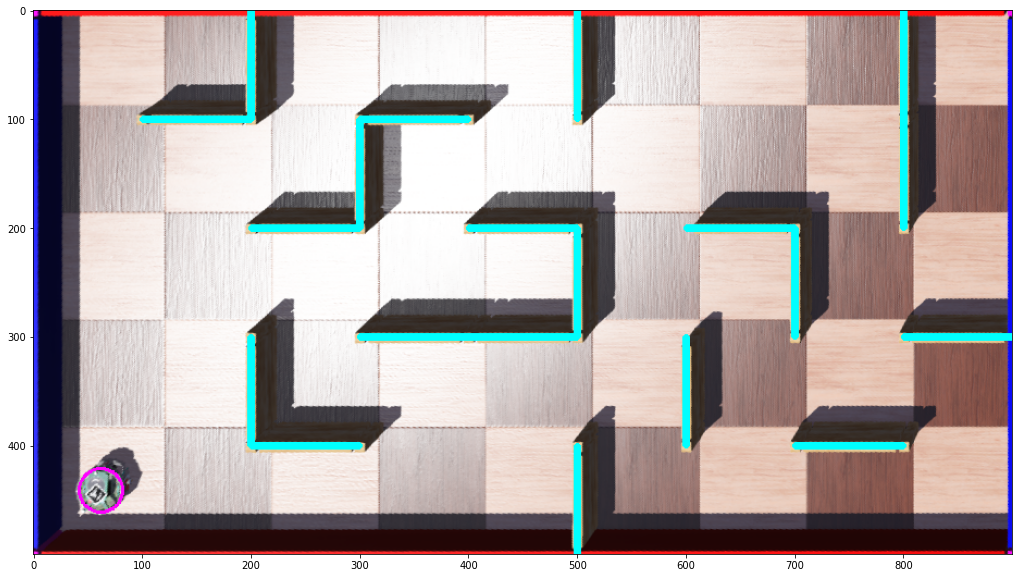

In [9]:
hsv_mask = cv2.cvtColor(masked_data2,cv2.COLOR_RGB2HSV)
center_h = 0
center_v = 0
counter = 0
botLoc = -1
for i in range(10,90):
    for j in range(10,90):
        if(hsv_mask[i,j,0] >= 34) and (hsv_mask[i,j,0] <= 87):
            center_h += j
            center_v += i
            counter += 1
            botLoc = 0
if(botLoc == -1):
    for i in range (10,90):
        for j in range(810,890):
            if(hsv_mask[i,j,0] >= 34) and (hsv_mask[i,j,0] <= 87):
                center_h += j
                center_v += i
                counter += 1
                botLoc = 1
if(botLoc == -1):
    for i in range (410,490):
        for j in range(10,90):
            if(hsv_mask[i,j,0] >= 34) and (hsv_mask[i,j,0] <= 87):
                center_h += j
                center_v += i
                counter += 1
                botLoc = 2
if(botLoc == -1):
    for i in range (410,490):
        for j in range(810,890):
            if(hsv_mask[i,j,0] >= 34) and (hsv_mask[i,j,0] <= 87):
                center_h += j
                center_v += i
                counter += 1
                botLoc = 3
print(botLoc)
center_h = int(center_h / counter)
center_v = int(center_v / counter)
print(center_h,center_v)
dst = cv2.circle(dst,(center_h,center_v),20,(255,0,255),2)
plt.figure(figsize = (18,10))
plt.imshow(dst)
plt.show()

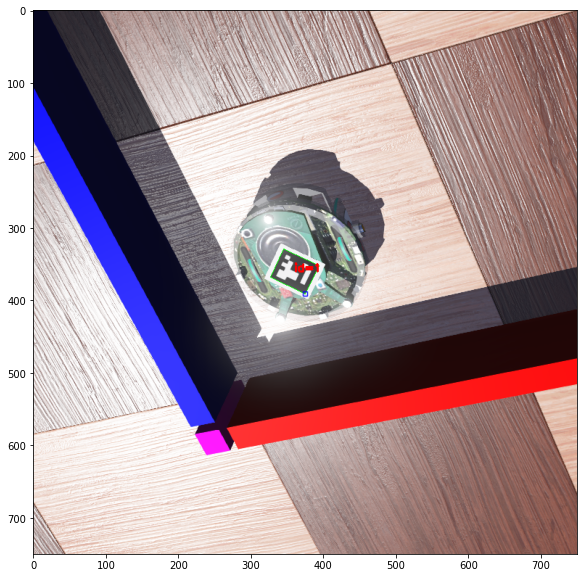

[[375. 391.]
 [327. 368.]
 [345. 329.]
 [394. 352.]]


In [10]:
img2 = cv2.imread('../ROBOT_TEST_10.png')
img_rgb2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create()
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(img_rgb2, dictionary, parameters=parameters)
img_rgb2 = cv2.aruco.drawDetectedMarkers(img_rgb2, markerCorners, markerIds)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb2)
plt.show()
print(markerCorners[0][0])
if(markerCorners[0][0][0][1] > markerCorners[0][0][1][1]):
    if(markerCorners[0][0][0][1] > markerCorners[0][0][2][1]):
        if(markerCorners[0][0][0][1] > markerCorners[0][0][3][1]):
            botOri = "V";
            dst = cv2.line(dst,(center_h-6,center_v-4),(center_h,center_v+4),(255,0,255),2)
            dst = cv2.line(dst,(center_h+6,center_v-4),(center_h,center_v+4),(255,0,255),2)
elif(markerCorners[0][0][0][1] < markerCorners[0][0][2][1]):
    if(markerCorners[0][0][0][1] < markerCorners[0][0][3][1]):
        botOri = "^";
        dst = cv2.line(dst,(center_h-6,center_v+4),(center_h,center_v-4),(255,0,255),2)
        dst = cv2.line(dst,(center_h+6,center_v+4),(center_h,center_v-4),(255,0,255),2)
if(markerCorners[0][0][0][0] > markerCorners[0][0][1][0]):
    if(markerCorners[0][0][0][0] > markerCorners[0][0][2][0]):
        if(markerCorners[0][0][0][0] > markerCorners[0][0][3][0]):
            botOri = ">";
            dst = cv2.line(dst,(center_h-4,center_v-6),(center_h+4,center_v),(255,0,255),2)
            dst = cv2.line(dst,(center_h-4,center_v+6),(center_h+4,center_v),(255,0,255),2)
elif(markerCorners[0][0][0][0] < markerCorners[0][0][2][0]):
    if(markerCorners[0][0][0][0] < markerCorners[0][0][3][0]):
        botOri = "<";
        dst = cv2.line(dst,(center_h+4,center_v-6),(center_h-4,center_v),(255,0,255),2)
        dst = cv2.line(dst,(center_h+4,center_v+6),(center_h-4,center_v),(255,0,255),2)

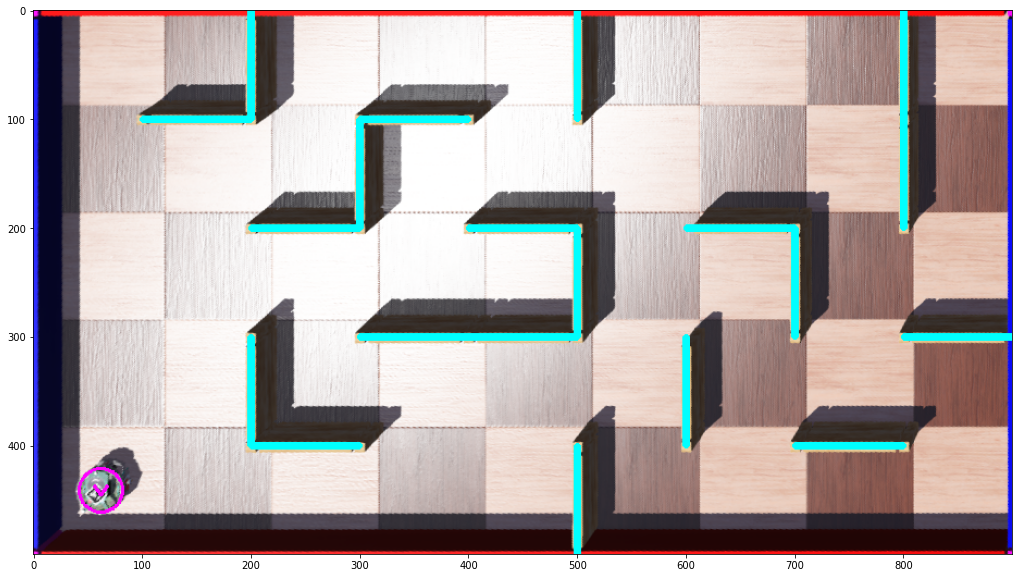

In [11]:
plt.figure(figsize = (18,10))
plt.imshow(dst)
plt.show()

In [12]:
file1 = open("../MapFound.txt","w")
str1 = " --- --- --- --- --- --- --- --- --- \n"
file1.write(str1)
for j in range(4):
    str2 = "| "
    for i in range(8):
        if(j == 0):
            if(i == 0):
                if(botLoc == 0):
                    str2 += botOri + " "
                else:
                    str2 += "  "
            else:
                str2 += "  "
        else:
            str2 += "  "
        if(masked_data2[j*100+50,i*100+100,0] == 0):
            str2 += "| "
        else:
            str2 += "  "
    if(j == 0):
        if(i == 7):
            if(botLoc == 1):
                str2 += botOri + " "
            else:
                str2 += "  "
    else:
        str2 += "  "
    str2 += "|\n"
    str3 = " "
    for i in range(9):
        if(masked_data2[j*100+100,i*100+50,0] == 0):
            str3 += "--- "
        else:
            str3 += "    "
    str3 += "\n"
    file1.write(str2)
    file1.write(str3)
str2 = "| "
for i in range(8):
    if(botLoc == 2):
        if(i == 0):
            str2 += botOri + " "
        else:
            str2 += "  "
    else:
        str2 += "  "
    if(masked_data2[450,i*100+100,0] == 0):
        str2 += "| "
    else:
        str2 += "  "
if(botLoc == 3):
    str2 += botOri + " "
else:
    str2 += "  "
str2 += "|\n"    
file1.write(str2)
file1.write(str1)
file1.close()

In [13]:
file2 = open("../MapFound.txt","r+")
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
print(file2.readline())
file2.close()

 --- --- --- --- --- --- --- --- --- 

|       |           |           |   |

     ---     ---                     

|           |                   |   |

         ---     ---     ---         

|                   |       |       |

             --- ---             --- 

|       |               |           |

         ---                 ---     

| V                 |               |

 --- --- --- --- --- --- --- --- --- 


